In [ ]:
from google.colab import drive
import zipfile as zip1
import os
drive.mount('/content/drive')
zip_ref = zip1.ZipFile('./drive/My Drive/kkbox-music-recommendation-challenge.zip', 'r')
zip_ref.extractall('all_data/')
zip_ref.close()

Mounted at /content/drive


In [ ]:
!pip install py7zr

     |████████████████████████████████| 71kB 9.2MB/s 
     |████████████████████████████████| 1.9MB 41.2MB/s 
     |████████████████████████████████| 122kB 61.5MB/s 
     |████████████████████████████████| 2.2MB 52.2MB/s 


In [ ]:
import py7zr
for file in os.listdir('./all_data/'):
  zip_ref = py7zr.SevenZipFile('./all_data/'+file, 'r')
  zip_ref.extractall('all_data/')
  zip_ref.close()

In [ ]:
import pandas as pd
songscsv = pd.read_csv('./all_data/songs.csv')
songscsv.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [ ]:
songscsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [ ]:
songs_infocsv = pd.read_csv('./all_data/song_extra_info.csv')
songs_infocsv

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [ ]:
songs_infocsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   song_id  object
 1   name     object
 2   isrc     object
dtypes: object(3)
memory usage: 52.6+ MB


In [ ]:
traincsv = pd.read_csv('./all_data/train.csv')
traincsv.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [ ]:
memberscsv = pd.read_csv('./all_data/members.csv',parse_dates=['registration_init_time','expiration_date'])
memberscsv.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13


In [ ]:
songData = songscsv.join(songs_infocsv.set_index('song_id'),on='song_id',how='left')
trainData = traincsv.join(songData.set_index('song_id'),on='song_id',how='left')
fullTrainData = trainData.join(memberscsv.set_index('msno'),on='msno',how='left')
testcsv = pd.read_csv('./all_data/test.csv')
testData = testcsv.join(songData.set_index('song_id'),on='song_id',how='left')
fullTestData = testData.join(memberscsv.set_index('msno'),on='msno',how='left')

In [ ]:
del songData
del trainData
del songscsv
del traincsv
del memberscsv
del testData
del testcsv

In [ ]:
def preprocessing(dataset):
  dataset['song_length'].fillna(dataset['song_length'].mean() , inplace = True)
  dataset['language'].fillna('language_unknown' , inplace= True)
  dataset['genre_ids'].fillna('genre_unknown' , inplace= True)
  dataset['source_type'].fillna('source_type_unknown',inplace=True)
  dataset['name'].fillna('unknown'+dataset['song_id'],inplace=True)
  dataset['artist_name'].fillna('artist_unknown' , inplace = True)
  dataset['composer'].fillna('composer_unknown',inplace=True)
  dataset['lyricist'].fillna('lyricist_unknown',inplace=True)
  dataset['membership_days'] = dataset['expiration_date'].subtract(dataset['registration_init_time']).dt.days.astype(int)
  dataset['registration_year'] = dataset['registration_init_time'].dt.year.astype(int)
  dataset['expiration_year'] = dataset['expiration_date'].dt.year.astype(int)
  dataset.drop(columns = ['registration_init_time' , 'expiration_date'] , inplace = True)
  dataset['gender'].fillna('gender_unknown' , inplace = True)
  dataset['source_system_tab'].fillna('source_system_tab_unknown',inplace=True)
  dataset['source_screen_name'].fillna('source_screen_name_unknown',inplace=True)

In [ ]:
preprocessing(fullTrainData)
preprocessing(fullTestData)

In [ ]:
import numpy as np
def sample(yer):
  if pd.isna(yer):
    return 0
  else:
    temp = int(yer)
    if temp >20:
      return temp+1900
    else:
      return temp+2000
fullTrainData['country_r'] = fullTrainData['isrc'].str.slice(0,2)
fullTrainData['year_r'] = fullTrainData['isrc'].str.slice(5,7).apply(sample) 
fullTrainData['some_id_r'] = fullTrainData['isrc'].str.slice(7,12)
fullTrainData['country_r'].fillna('XX',inplace=True)
fullTrainData['is_new'] = fullTrainData['year_r'] > 2005
fullTrainData.drop(columns = ['some_id_r' , 'isrc'] , inplace = True)

fullTestData['country_r'] = fullTestData['isrc'].str.slice(0,2)
fullTestData['year_r'] = fullTestData['isrc'].str.slice(5,7).apply(sample) 
fullTestData['some_id_r'] = fullTestData['isrc'].str.slice(7,12)
fullTestData['country_r'].fillna('XX',inplace=True)
fullTestData['is_new'] = fullTestData['year_r'] > 2005
fullTestData.drop(columns = ['some_id_r' , 'isrc'] , inplace = True)

In [ ]:
genreList = []
def genre_count(genre):
  for d in genre.split('|'):
    genreList.append(d)
  return genre.split('|')[len(genre.split('|'))-1]
fullTrainData['genre_ids'] = fullTrainData['genre_ids'].apply(genre_count)
fullTestData['genre_ids'] = fullTestData['genre_ids'].apply(genre_count)

In [ ]:
trt = fullTrainData['artist_name'].value_counts().sort_values(ascending=False).reset_index().rename(columns={'artist_name':'value_count','index':'artist_name'})
trt['cumsum'] = trt['value_count'].cumsum()
def bins(cumsum):
  if cumsum < int(len(fullTrainData)/3):
    return 2
  elif cumsum < int(len(fullTrainData)/3)*2:
    return 1
  else:
    return 0

trt['bin'] = trt['cumsum'].apply(bins)
trt.drop(columns={'value_count','cumsum'},inplace=True)
trt = trt.rename(columns={'bin':'artist_bin'})

In [ ]:
fullTrainData.join(trt.set_index('artist_name'),on='artist_name',how='inner')
fullTrainData.drop(columns = ['song_id' , 'msno','year_r','artist_name','name'] , inplace = True)

fullTestData.join(trt.set_index('artist_name'),on='artist_name',how='inner')
fullTestData.drop(columns = ['song_id' , 'msno','year_r','artist_name','name'] , inplace = True)

In [ ]:
del trt

In [ ]:
fullTrainData.head()

,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,composer,lyricist,language,city,bd,gender,registered_via,membership_days,registration_year,expiration_year,country_r,is_new
0,explore,Explore,online-playlist,1,206471.0,359,Dan Smith| Mark Crew,lyricist_unknown,52,1,0,gender_unknown,7,2103,2012,2017,GB,True
1,my library,Local playlist more,local-playlist,1,284584.0,1259,composer_unknown,lyricist_unknown,52,13,24,female,9,2301,2011,2017,US,False
2,my library,Local playlist more,local-playlist,1,225396.0,1259,N. Jones、W. Adams、J. Lordan、D. Ingle,lyricist_unknown,52,13,24,female,9,2301,2011,2017,US,True
3,my library,Local playlist more,local-playlist,1,255512.0,1019,Kwadwo Donkoh,lyricist_unknown,-1,13,24,female,9,2301,2011,2017,GB,True
4,explore,Explore,online-playlist,1,187802.0,1011,Brett Young| Kelly Archer| Justin Ebach,lyricist_unknown,52,1,0,gender_unknown,7,2103,2012,2017,QM,True


In [ ]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
#label_encoding = ['source_system_tab', 'source_screen_name','source_type','gender','genre_ids','lyricist','composer']
fullTrainData.drop(columns={'lyricist','composer'},inplace=True)
fullTestData.drop(columns={'lyricist','composer'},inplace=True)

label_encoding = ['source_system_tab', 'source_screen_name','source_type','gender','genre_ids','country_r','is_new','language']
min_max_scaling = ['membership_days', 'song_length','registration_year','expiration_year']

for f in label_encoding:
    lb = LabelEncoder()
    lb.fit(list(fullTrainData[f].values)+list(fullTestData[f].values))
    fullTrainData[f] = lb.transform(list(fullTrainData[f].values))
    fullTestData[f] = lb.transform(list(fullTestData[f].values))
for f in min_max_scaling:
    ms = MinMaxScaler()
    fullTrainData[f] = ms.fit_transform(fullTrainData[[f]])
    fullTestData[f] = ms.transform(fullTestData[[f]])

In [ ]:
fullTestData.head()

,id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,language,city,bd,gender,registered_via,membership_days,registration_year,expiration_year,country_r,is_new
0,0,3,8,3,0.020528,116,4,1,0,1,7,0.785754,0.923077,0.94,101,1
1,1,3,8,3,0.029407,117,4,1,0,1,7,0.785754,0.923077,0.94,101,1
2,2,0,22,9,0.028986,62,2,1,0,1,4,0.759044,0.923077,0.92,54,1
3,3,5,16,7,0.026157,117,8,3,30,2,9,0.925867,0.230769,0.94,33,0
4,4,5,16,7,0.018082,147,0,3,30,2,9,0.925867,0.230769,0.94,51,1


In [ ]:
import numpy as np
y_train = fullTrainData['target'].to_numpy()
fullTrainData.drop(columns={'target'},inplace=True)
x_train = fullTrainData.to_numpy()


submit_to_kaggle = fullTestData['id']
fullTestData.drop(columns={'id'},inplace=True)
x_test = fullTestData.to_numpy()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(x_train,y_train)

y_test_predict = classifier.predict(x_test)
kaggleop2 = pd.DataFrame(submit_to_kaggle)
kaggleop2['target'] = pd.DataFrame(y_test_predict)

In [ ]:
kaggleop2.to_csv('./all_data/my_submission.csv',index=False)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradientBoostclf = GradientBoostingClassifier(n_estimators=100, random_state=0)
gradientBoostclf.fit(x_train, y_train)
y_test_predict = gradientBoostclf.predict(x_test)
kaggleop3 = pd.DataFrame(submit_to_kaggle)
kaggleop3['target'] = pd.DataFrame(y_test_predict)

In [ ]:
kaggleop3.to_csv('./all_data/my_submission_xgb.csv',index=False)

In [ ]:
kaggleop2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 2 columns):
 #   Column  Dtype
---  ------  -----
 0   id      int64
 1   target  int64
dtypes: int64(2)
memory usage: 39.0 MB


In [ ]:
fullTrainData.head()

,source_system_tab,source_screen_name,source_type,song_length,genre_ids,language,city,bd,gender,registered_via,membership_days,registration_year,expiration_year,country_r,is_new
0,1,7,6,0.018901,104,8,1,0,1,7,0.857263,0.615385,0.94,33,1
1,3,8,4,0.026100,33,8,13,24,0,9,0.866542,0.538462,0.94,107,0
2,3,8,4,0.020645,33,8,13,24,0,9,0.866542,0.538462,0.94,107,1
3,3,8,4,0.023420,3,0,13,24,0,9,0.866542,0.538462,0.94,33,1
4,1,7,6,0.017180,2,8,1,0,1,7,0.857263,0.615385,0.94,83,1


In [ ]:
fullTrainData.corr(method='pearson')

,source_system_tab,source_screen_name,source_type,song_length,genre_ids,language,city,bd,gender,registered_via,membership_days,registration_year,expiration_year,country_r,is_new
source_system_tab,1.000000,0.008742,-0.068557,0.024293,0.044247,-0.059324,0.022347,0.023953,0.008086,0.034411,0.045494,-0.039057,0.038289,0.027561,-0.133848
source_screen_name,0.008742,1.000000,0.410887,0.025384,-0.007519,-0.024714,-0.021327,-0.013956,0.001072,-0.033478,-0.042402,0.038885,-0.026651,-0.005270,-0.037963
source_type,-0.068557,0.410887,1.000000,0.016868,-0.046243,0.000482,-0.023869,-0.004200,-0.001319,-0.026142,-0.036720,0.032074,-0.036122,-0.031782,-0.010754
song_length,0.024293,0.025384,0.016868,1.000000,0.044709,-0.189301,0.005185,0.004896,0.011652,0.002749,0.007793,-0.007435,0.004572,0.023633,-0.085420
genre_ids,0.044247,-0.007519,-0.046243,0.044709,1.000000,-0.294976,-0.000255,0.003723,-0.025109,0.005171,0.004837,-0.004630,0.006988,0.055539,-0.080735
language,-0.059324,-0.024714,0.000482,-0.189301,-0.294976,1.000000,-0.003601,-0.008376,-0.007621,-0.004497,-0.005201,0.005703,-0.001267,-0.049497,0.191918
city,0.022347,-0.021327,-0.023869,0.005185,-0.000255,-0.003601,1.000000,0.400535,0.035308,0.073756,0.294677,-0.280175,0.150147,0.010952,0.007307
bd,0.023953,-0.013956,-0.004200,0.004896,0.003723,-0.008376,0.400535,1.000000,0.005403,0.098428,0.332073,-0.324339,0.117599,0.003333,-0.013086
gender,0.008086,0.001072,-0.001319,0.011652,-0.025109,-0.007621,0.035308,0.005403,1.000000,-0.028061,-0.011836,0.013025,-0.000750,0.002906,-0.009013
registered_via,0.034411,-0.033478,-0.026142,0.002749,0.005171,-0.004497,0.073756,0.098428,-0.028061,1.000000,0.449860,-0.442730,0.084135,-0.000921,-0.018702


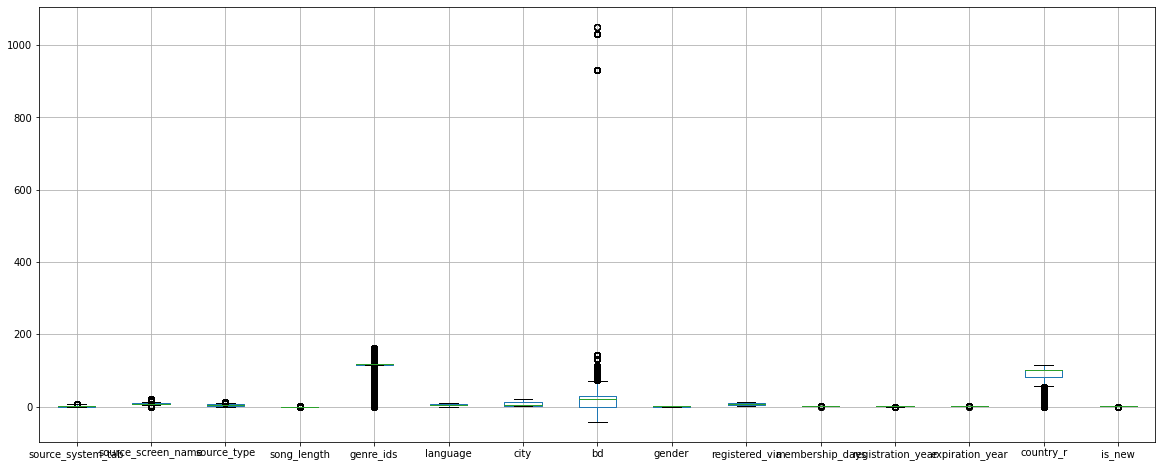

In [ ]:
fullTrainData.boxplot(figsize=(20,8))

In [ ]:
fullTrainData.isna().sum()

source_system_tab     0
source_screen_name    0
source_type           0
song_length           0
genre_ids             0
language              0
city                  0
bd                    0
gender                0
registered_via        0
membership_days       0
registration_year     0
expiration_year       0
country_r             0
is_new                0
dtype: int64

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
def categorical_count_plots(col_name):
  plt.figure(figsize=(20,5))
  sns.countplot(x=col_name,data=fullTrainData)
  sns.set_theme(style="darkgrid")
  plt.xlabel(col_name)
  plt.ylabel('count')
  plt.xticks(rotation='75')
  plt.title('Count plot for '+col_name)
  plt.tight_layout()

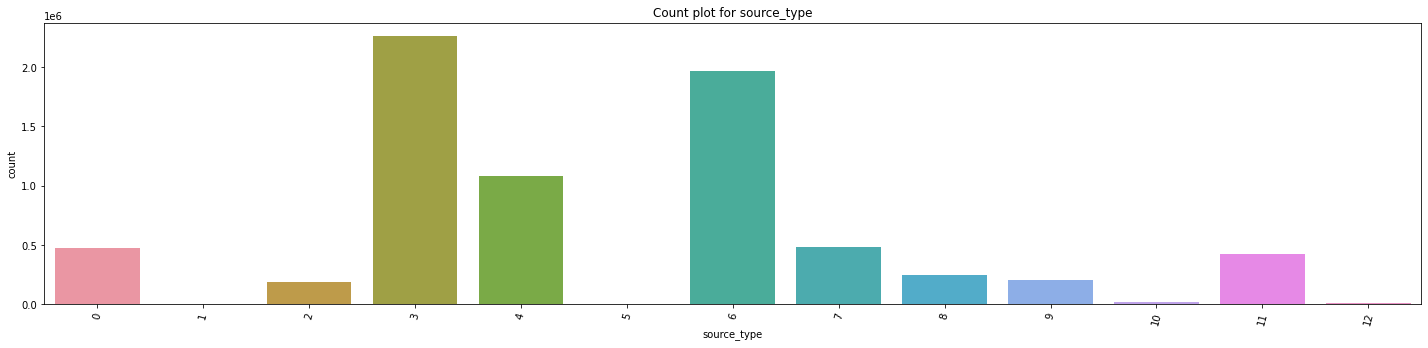

In [ ]:
categorical_count_plots('source_type')

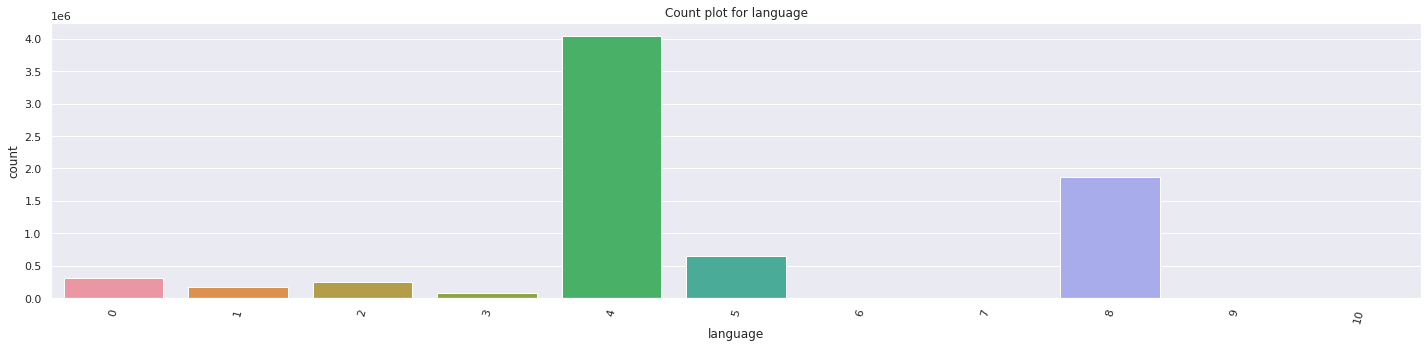

In [ ]:
categorical_count_plots('language')

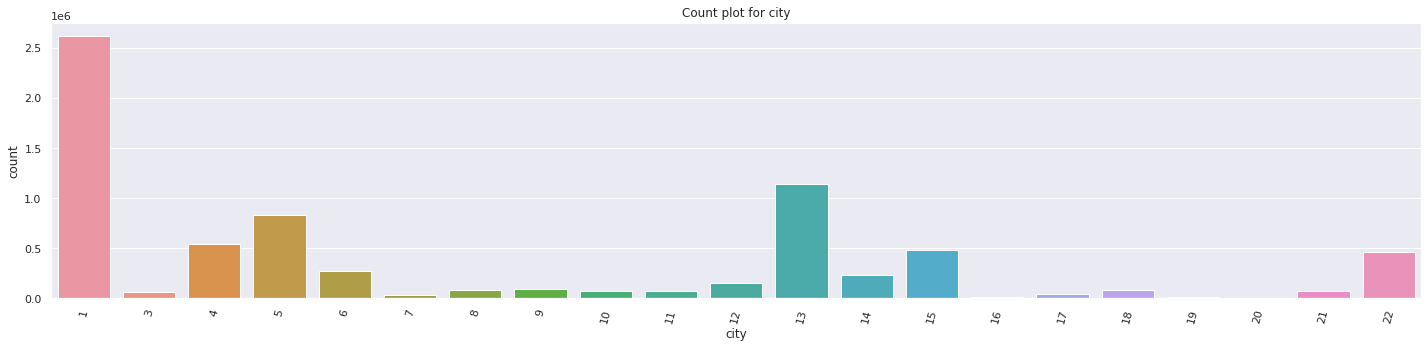

In [ ]:
categorical_count_plots('city')

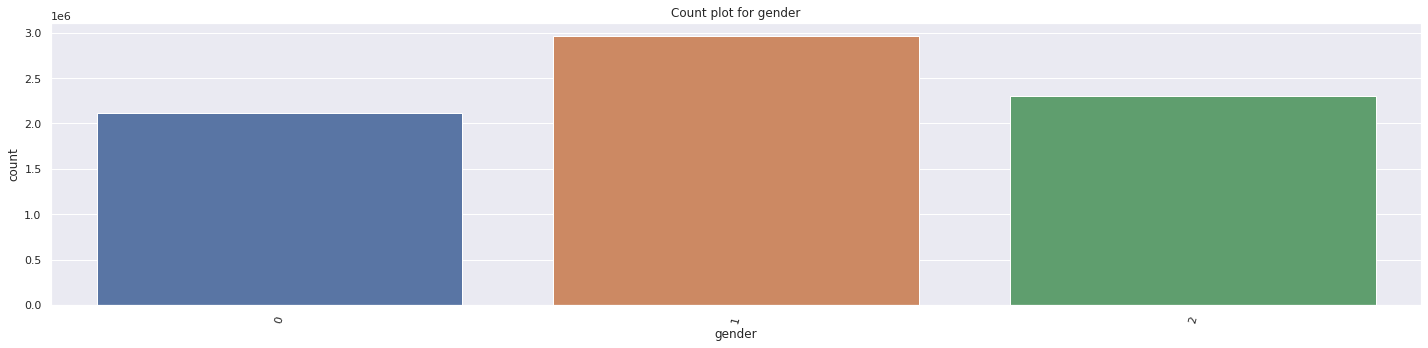

In [ ]:
categorical_count_plots('gender')

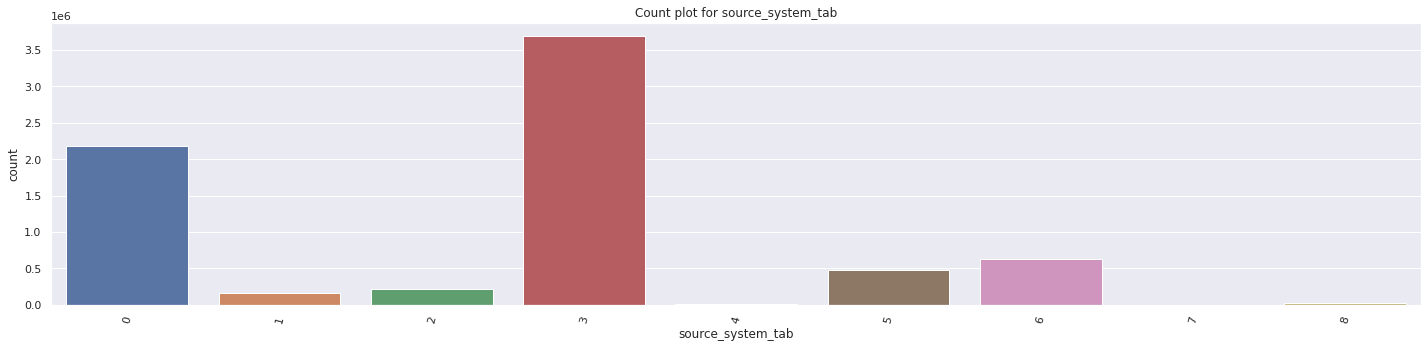

In [ ]:
categorical_count_plots('source_system_tab')

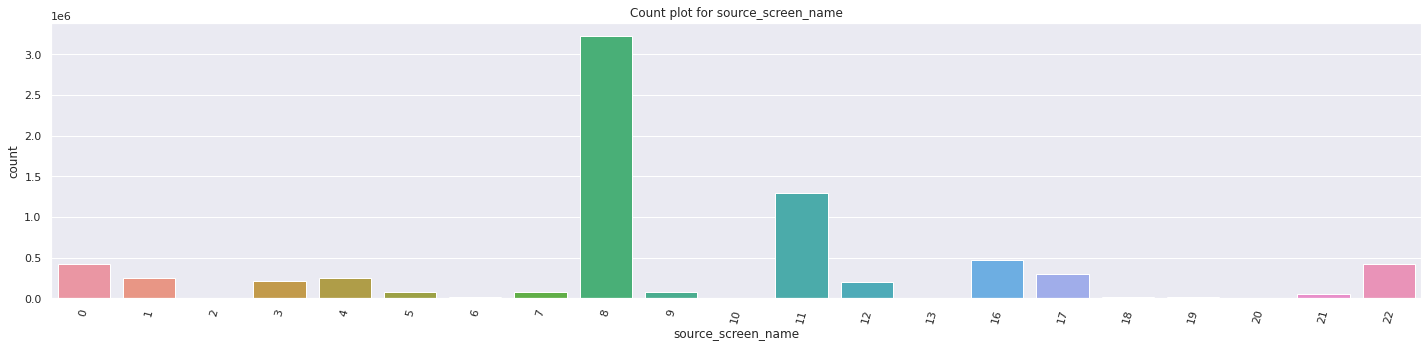

In [ ]:
categorical_count_plots('source_screen_name')

In [ ]:
genreList = []
def genre_count(genre):
  for d in genre.split('|'):
    genreList.append(d)
  return genre.split('|')[len(genre.split('|'))-1]
fullTrainData['artist_name'] = fullTrainData['artist_name'].apply(genre_count)

In [ ]:
fullTrainData.isna().sum()

In [ ]:
fullTrainData.info()

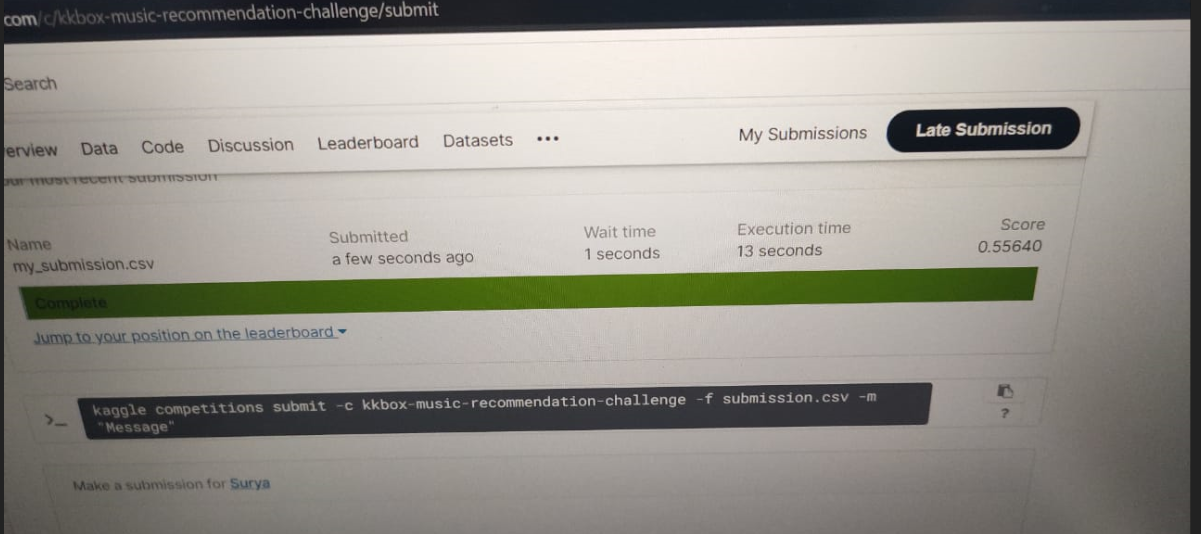